## 1 Regularization and Intercept
(a)

The loss function $\mathcal{L}(\boldsymbol{\beta})$ for ridge regression with $N$ observations is given by 
$$\mathcal{L}(\boldsymbol{\beta}| (\boldsymbol{X}, \boldsymbol{y})) = ||\boldsymbol{y} - \boldsymbol{X}^T\boldsymbol{\beta} ||_{L^2}^2 + \lambda ||\boldsymbol{\beta}||_{L^2}^2 = \sum_{i=1}^N (y^{(i)} - \beta_0 - \beta_1 x_1^{(i)} - \beta_2x_2^{(i)})^2 + \lambda (\beta_0^2 + \beta_1^2 + \beta_2^2).$$ 
The intercept occurs both in the common loss function as well as the regularization term. A large value for the regularization strength $\lambda$ will suppress the contribution of the intercept to the common loss function and the intercept will tend to zero.

(b) 

We can modify the loss function by removing the regularization of the intercept $\lambda \beta_0^2$ altogether. The loss function then reads
$$\mathcal{L}(\boldsymbol{\beta}| (\boldsymbol{X}, \boldsymbol{y})) =\sum_{i=1}^N (y^{(i)} - \beta_0 - \beta_1 x_1^{(i)} - \beta_2x_2^{(i)})^2 + \lambda (\beta_1^2 + \beta_2^2).$$

(c)

The regularization strength can be interpreted as a Lagrange multiplier. Regularization contours are given by 
$$const. = \beta_0^2 + \beta_1^2 + \beta_2^2.$$
and
$$const. = \beta_1^2 + \beta_2^2$$
for (a), (b) respectively. These equations describe the 2-sphere and 1-sphere for some radii.


## 2 Variance Estimation
(a) Maximum Likelihood
The estimator $\boldsymbol{\beta}$ is given by
$$\hat{\boldsymbol{\beta}} = \underset{\boldsymbol{\beta}}{\mathrm{arg}\,\mathrm{max}} \sum_{n=1}^N\log \mathcal{N}\left(y_n| \boldsymbol{\beta}^T \boldsymbol{x}_n, \sigma^2\right)$$
$$= \underset{\boldsymbol{\beta}}{\mathrm{arg}\,\mathrm{max}} \sum_{n=1}^N \log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) + \log\left(\exp\left(-\frac{(y_n - \boldsymbol{\beta}^T\boldsymbol{x}_n)^2}{2\sigma^2}\right)\right)$$
$$= \underset{\boldsymbol{\beta}}{\mathrm{arg}\,\mathrm{max}} \sum_{n=1}^N const -\frac{(y_n - \boldsymbol{\beta}^T\boldsymbol{x}_n)^2}{2\sigma^2} $$
$$= \underset{\boldsymbol{\beta}}{\mathrm{arg}\,\mathrm{min}} \sum_{n=1}^N (y_n - \boldsymbol{\beta}^T\boldsymbol{x}_n)^2$$
$$= \underset{\boldsymbol{\beta}}{\mathrm{arg}\,\mathrm{min}} (\boldsymbol{y} - \boldsymbol{X}^T\boldsymbol{\beta})^T(\boldsymbol{y} - \boldsymbol{X}^T\boldsymbol{\beta})$$
in the log-likelihood formulation, which is equivalent to the estimator yielded by the sum-of-squares formulation.


## 3 Visualize Regularization Contours

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

x.shape: (2, 100), "y.shape:" (1, 100)


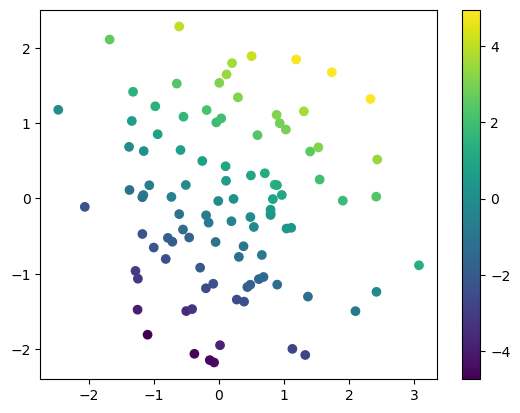

In [2]:
# load the data
data = np.load('data/linreg.npz')
x = data['X']
y = data['Y']
print(f'x.shape: {x.shape}, "y.shape:" {y.shape}')
plt.scatter(*x, c=y);
plt.colorbar()
plt.show()

In [3]:
# create a grid of points in the parameter space
b1, b2 = np.linspace(-1, 3, 101), np.linspace(-1, 3, 101)
bs = np.stack(np.meshgrid(b1, b2, indexing='ij'), axis=-1)
bs.shape

(101, 101, 2)

### (a)

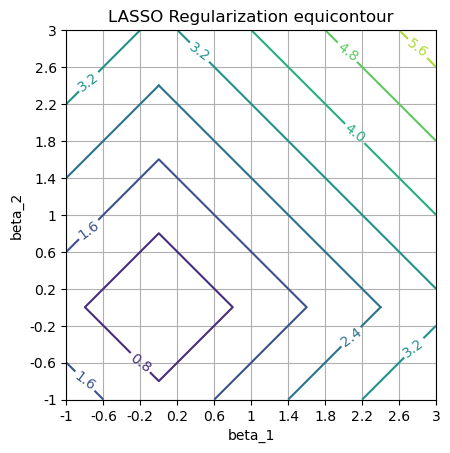

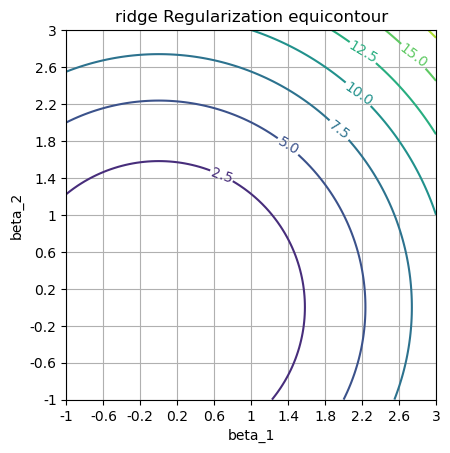

In [4]:
# defining regularization terms
def ridge_regularization(beta):
    return np.sum(beta ** 2, axis=-1)

def lasso_regularization(beta):
    return np.sum(np.abs(beta), axis=-1)

# ploting method
def contour_plot(arr, title=""):
    
    fig, ax = plt.subplots()
    CS = ax.contour(arr)
    ax.clabel(CS, inline=True, fontsize=10)

    ticks = [f"{number:.2g}" for number in np.linspace(-1, 3,11)]
    ax.set_xticks(np.arange(0,101, 10), ticks)
    ax.set_yticks(np.arange(0,101, 10), ticks)
    if title:
        plt.title(title)
    ax.set_aspect(1)
    ax.set_xlabel("beta_1")
    ax.set_ylabel("beta_2")
    plt.grid()
    plt.show()

contour_plot(lasso_regularization(bs), title="LASSO Regularization equicontour")
contour_plot(ridge_regularization(bs), title="ridge Regularization equicontour")

As we can see, the LASSO equicontours resemble diamonds whereas the ridge equicontour resembles rings (1-spheres).

### (b)

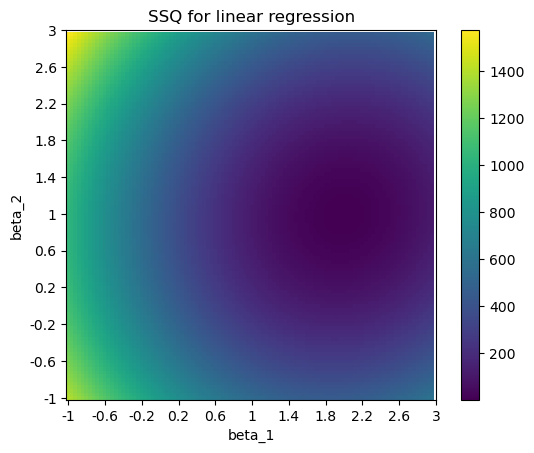

In [5]:
# linear model (supports vectorization)
def SSQ(beta, X, y):
    # have to truncate the edge of beta
    return np.sum((y - beta[:100, :100, :] @ X) ** 2, axis=-1)


def loss_visualization(func, title=""):
    plt.imshow(func(bs, x, y), origin="lower")
    plt.title(title)
    ticks = [f"{number:.2g}" for number in np.linspace(-1, 3,11)]
    plt.xticks(np.arange(0,101, 10), ticks)
    plt.yticks(np.arange(0,101, 10), ticks)
    plt.xlabel("beta_1")
    plt.ylabel("beta_2")
    plt.colorbar()
    plt.show()

loss_visualization(func = SSQ, title="SSQ for linear regression")

### (c)

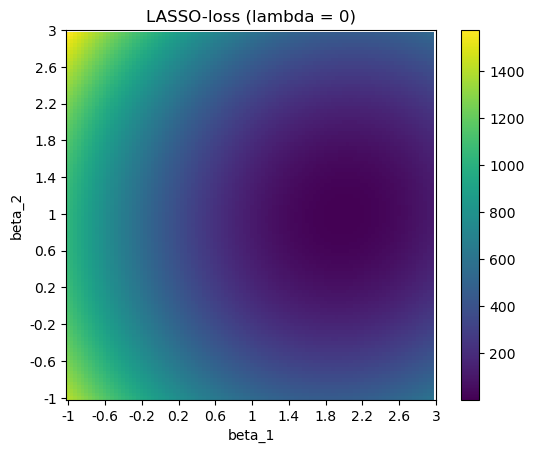

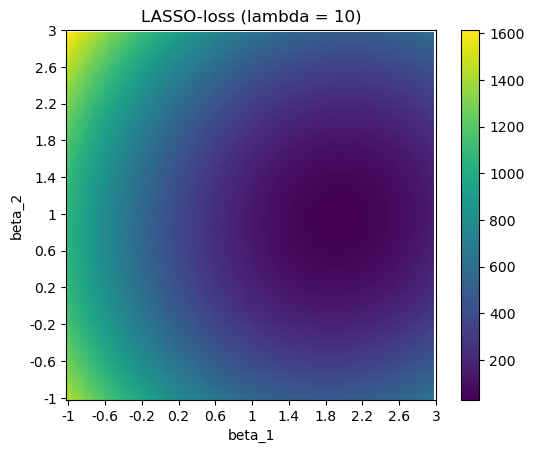

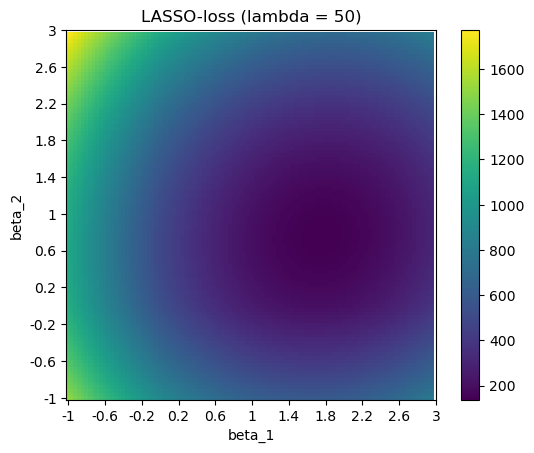

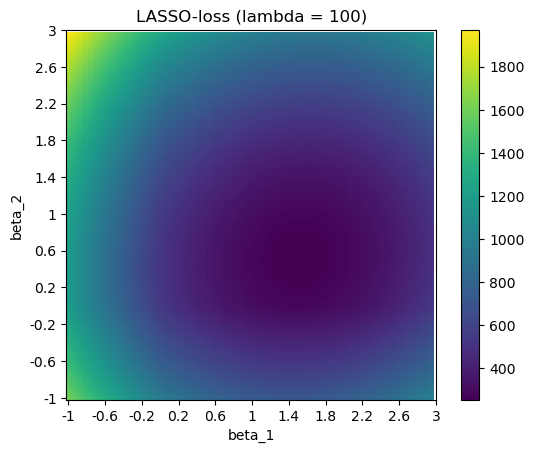

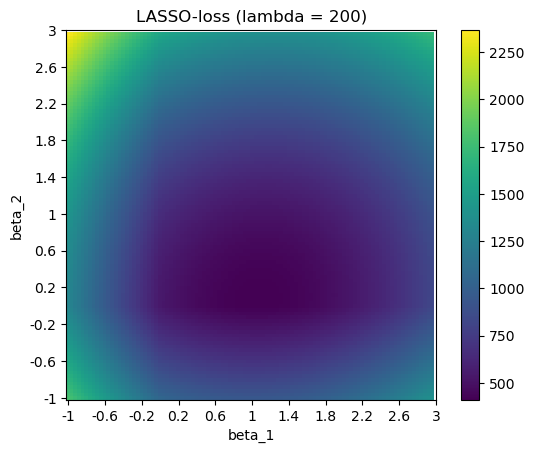

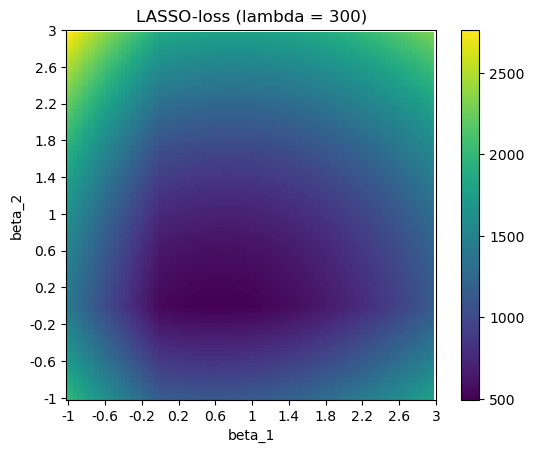

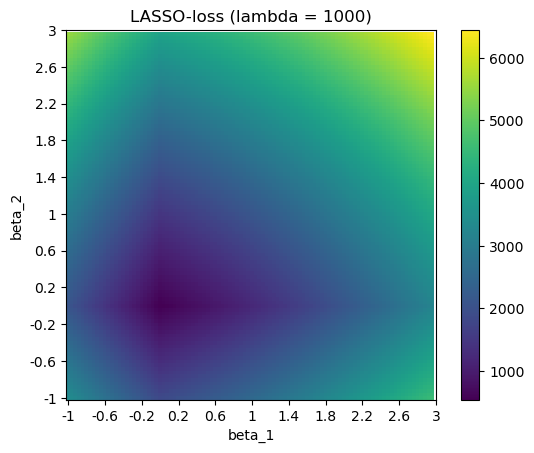

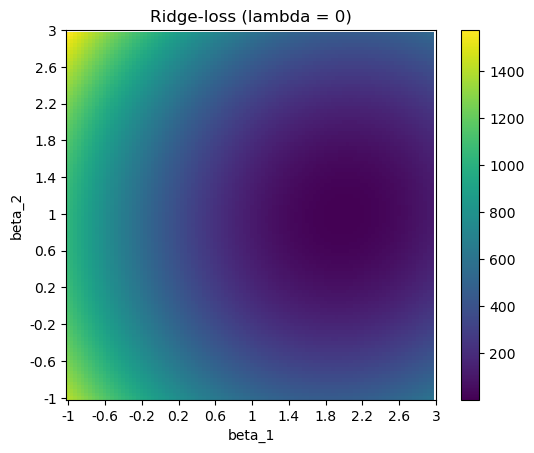

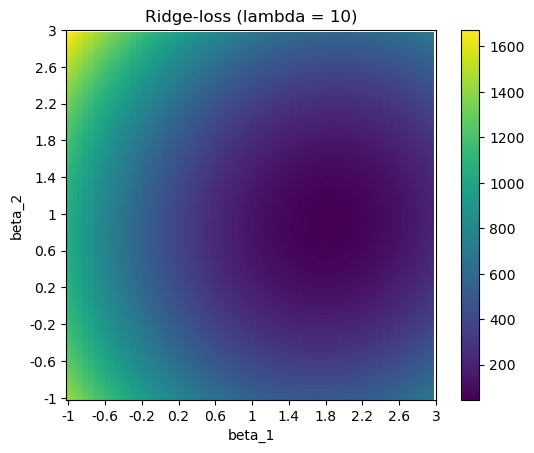

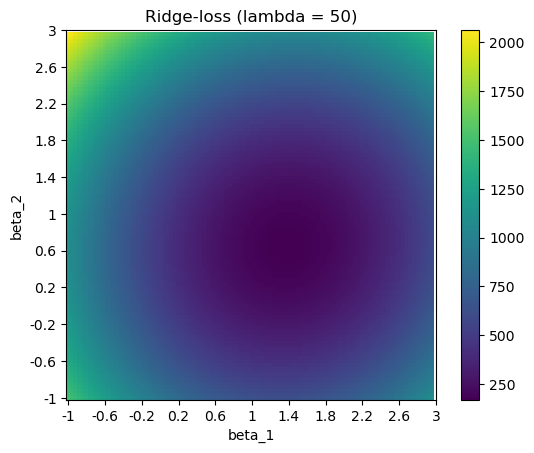

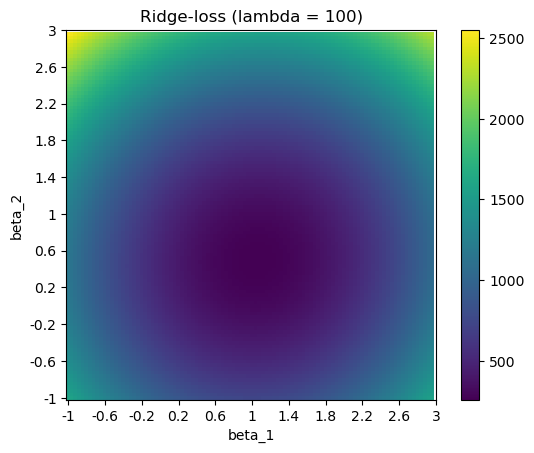

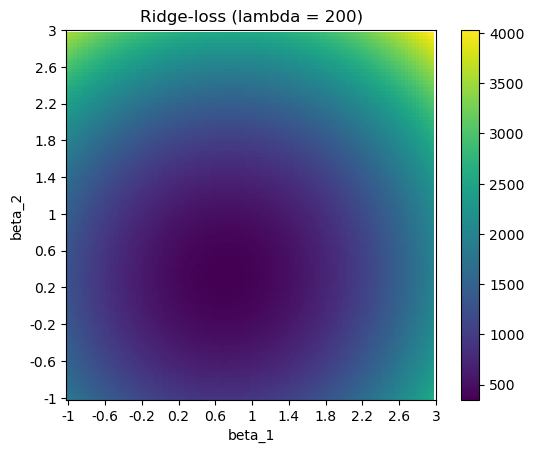

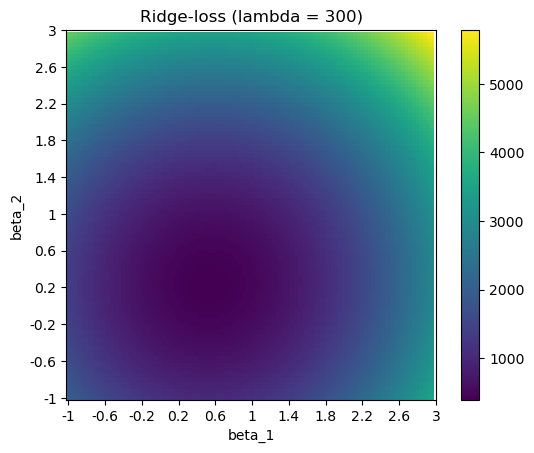

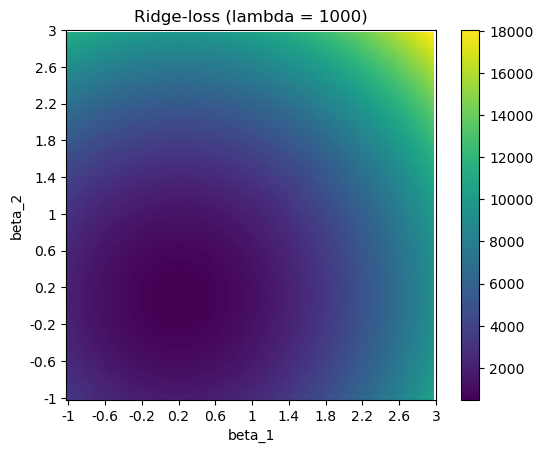

In [6]:
# TODO: for each lambda, plot both ridge regression and lasso loss functions
lambdas = [0, 10, 50, 100, 200, 300,1000]


# defining loss functions
def loss(beta, X, y, _lambda, q):
    ssq = SSQ(beta, X, y)
    reg = _lambda *  np.sum(np.abs(beta[:100, :100,])**q, axis=-1)
    return ssq + reg
    

# creating the plots procedurally
for q in (1, 2):
    for _lambda in lambdas:
        loss_visualization(
            func=lambda *x: loss(*x, _lambda =_lambda, q = q), title=f'{("LASSO", "Ridge")[q-1]}-loss (lambda = {_lambda})'
        )

    

From the visualization we can observe that as the regularization penalty is increased, the loss is biased towards parameters $\boldsymbol{\beta}$ around zero. In case of the LASSO regularization, the loss again assumes a diamond shape in the limit of high $\lambda$, in contradistiction to the ridge regularization which keeps its bulbous circular shape of loss landscape, qualitatively similar in shape to the non-regularized loss term.

## 4 CT Reconstruction

First, set up the design matrix. (Run this once to save it to the disk)

In [7]:
# create design matrix
# don't change any of this, just run it once to create and save the design matrix
import os

n_parallel_rays = 70 
n_ray_angles = 30
res = (99, 117)
print("Number of pixels in the 2d image:", np.prod(res))
print("Total number of rays:", n_parallel_rays * n_ray_angles)

def rot_mat(angle):
    c, s = np.cos(angle), np.sin(angle)
    return np.stack([np.stack([c, s], axis=-1), np.stack([-s, c], axis=-1)], axis=-1)

kernel = lambda x: np.exp(-x**2/sigma**2/2)

if not os.path.exists('data/design_matrix.npy'):
    xs = np.arange(0, res[1]+1) - res[1]/2 # np.linspace(-1, 1, res[1] + 1)
    ys = np.arange(0, res[0]+1) - res[0]/2 # np.linspace(-1, 1, res[0] + 1)

    # rays are defined by origin and direction
    ray_offset_range = [-res[1]/1.5, res[1]/1.5]
    n_rays = n_parallel_rays * n_ray_angles

    ray_angles = np.linspace(0, np.pi, n_ray_angles, endpoint=False) + np.pi/n_ray_angles

    # offsets for ray_angle = 0, i.e. parallel to x-axis
    ray_0_offsets = np.stack([np.zeros(n_parallel_rays), np.linspace(*ray_offset_range, n_parallel_rays)], axis=-1)
    ray_0_directions = np.stack([np.ones(n_parallel_rays), np.zeros(n_parallel_rays)], axis=-1)

    

    ray_rot_mats = rot_mat(ray_angles)

    ray_offsets = np.einsum('oi,aij->aoj', ray_0_offsets, ray_rot_mats).reshape(-1, 2)
    ray_directions = np.einsum('oi,aij->aoj', ray_0_directions, ray_rot_mats).reshape(-1, 2)

    sigma = 1
    xsc = (xs[1:] + xs[:-1]) / 2
    ysc = (ys[1:] + ys[:-1]) / 2
    b = np.stack(np.meshgrid(xsc, ysc), axis=-1).reshape(-1, 2)
    a = ray_offsets
    v = ray_directions
    v = v / np.linalg.norm(v, axis=-1, keepdims=True)
    p = ((b[None] - a[:, None]) * v[:, None]).sum(-1, keepdims=True) * v[:, None] + a[:, None]
    d = np.linalg.norm(b - p, axis=-1)
    d = kernel(d)
    design_matrix = d.T

    np.save('data/design_matrix.npy', design_matrix)
    print(f'created and saved design matrix of shape {design_matrix.shape} at data/design_matrix.npy')

Number of pixels in the 2d image: 11583
Total number of rays: 2100
created and saved design matrix of shape (11583, 2100) at data/design_matrix.npy


sino shape: (1, 2100)


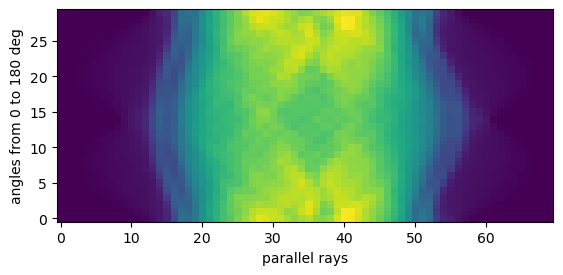

In [90]:
sino = np.load('data/sino.npy')

print(f'sino shape: {sino.shape}')

# visualize sinogram as image
n_parallel_rays = 70
n_angles = 30
plt.imshow(sino.reshape(n_angles, n_parallel_rays), origin='lower')
plt.xlabel('parallel rays')
plt.ylabel('angles from 0 to 180 deg')
plt.show();

### (a)

Text(0.5, 0.98, 'Four random columns')

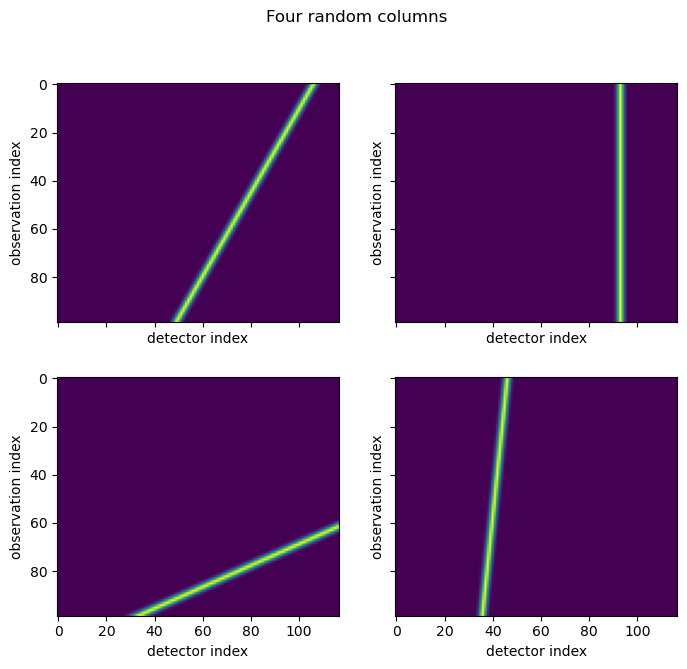

In [91]:
design_matrix = np.load('data/design_matrix.npy')
X = design_matrix
fig, axes = plt.subplots(2,2,figsize=(8,7), sharey=True, sharex=True)
axes = axes.flatten()
for i , ax in enumerate(axes):
    ax.imshow(np.reshape(X[:,np.random.randint(low=0, high=30*70)], (99,117)))
    ax.set_xlabel("detector index")
    ax.set_ylabel("observation index")
fig.suptitle("Four random columns")

Each column of the design matrix corresponds to the signal received by the 117 detectors at their respective 99 angles produced by one ray. 

### (b)

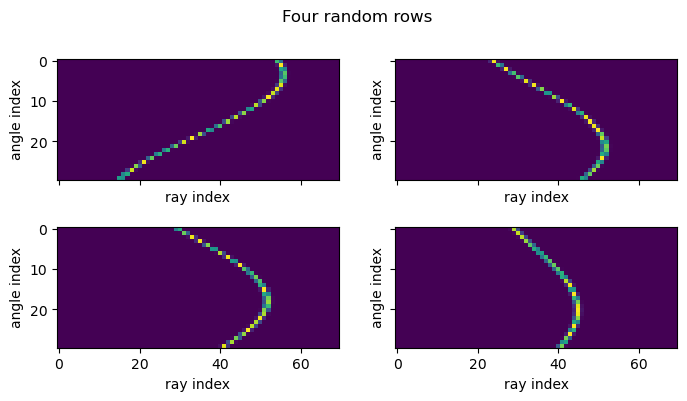

In [92]:
# TODO: visualize four random rows as images, using an image shape of (30, 70)
fig, axes = plt.subplots(2,2, figsize=(8,4), sharey=True, sharex=True)
axes = axes.flatten()
for i , ax in enumerate(axes):
    ax.imshow(np.reshape(X[np.random.randint(low=0, high=117*99),:], (30,70)))
    ax.set_xlabel("ray index")
    ax.set_ylabel("angle index")
fig.suptitle("Four random rows")
plt.show()

Each row of the design matrix consists of the signal that a single detector at fixed angle produces over time (assuming that the observations are recorded sequentially in time).

### (c)
We consider the linear regression as the limit of the regularization strength $\lambda$ (\texttt{sklearn} calls it $\alpha$) going to zero. We choose to fit the intercept to offer more degrees of freedom.

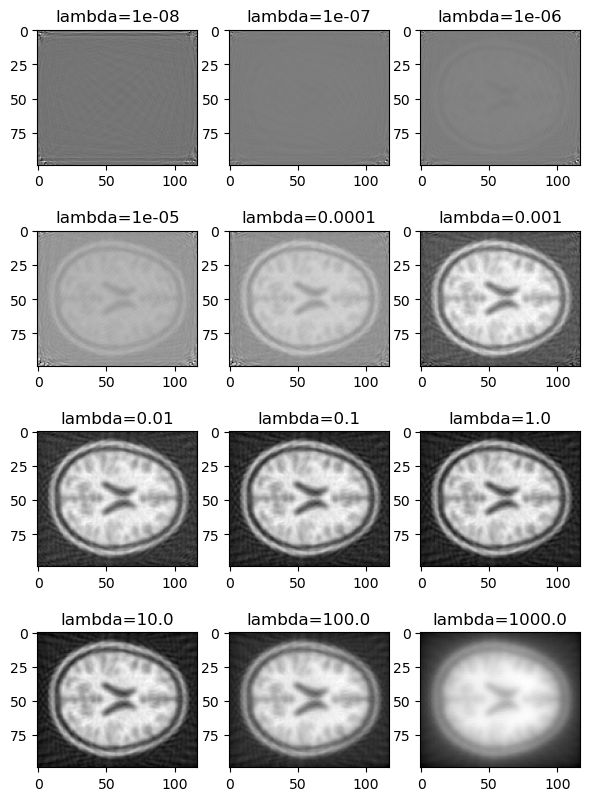

In [94]:
from sklearn.linear_model import Ridge
fig, axes = plt.subplots(4, 3, figsize=(7, 10))
axes = axes.flatten()
for ax, alpha in zip(axes,np.logspace(-8, 3, 12)):
    rr = Ridge(fit_intercept=True, alpha=alpha)
    rr.fit(X.T, sino.T)
    ax.imshow(np.reshape(rr.coef_, (99, 117)), cmap="gray")
    ax.set_title("lambda="+str(alpha))
plt.show()

As we can see from the results, the unregularized regression in the limit of $\lambda \rightarrow 0$ fails to produce any significant structure and instead overfits to the artifacts of the CT-scan setup, which appear as sort-of diagonal stripes across the image. By enforcing sparsity of the parameters $\boldsymbol{\beta}$ (= many coefficients going to zero) through higher values of $\lambda$, the reconstruction eventually leads to plausible images of a brain CT. Subjectively, $\lambda \in [0.01, 0.1]$ seems to preserve as much medical information as possible, as higher values blur the information while lower values overfit to the artifacts of reconstruction.

## 5 Bonus: X-Ray Free-Electron Lasers

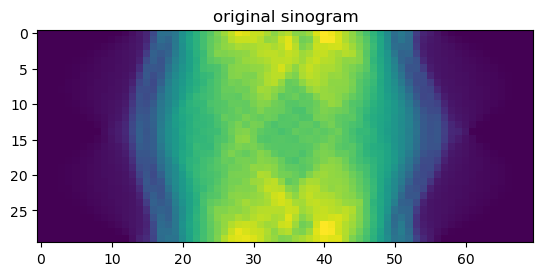

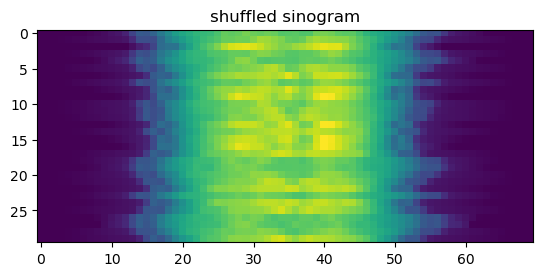

In [95]:
sino2 = np.load('data/sino.npy').reshape(n_angles, n_parallel_rays)
plt.imshow(sino2)
plt.title('original sinogram')
plt.show()

order = np.arange(n_angles)
np.random.shuffle(order)
sino_shuffled = sino2[order]
plt.imshow(sino_shuffled)
plt.title('shuffled sinogram')
plt.show()

(?) The reconstruction can be solved by fitting the model for each angle separately and aggregating (i.e. taking the median of) the obtained images.

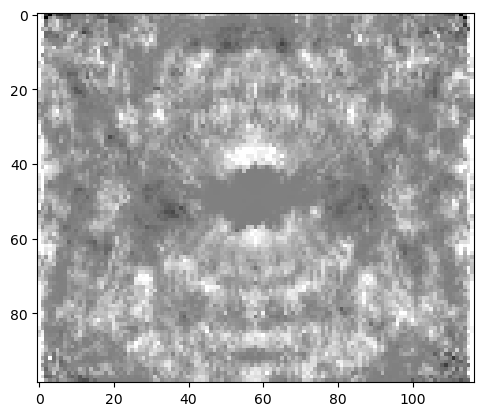

In [237]:
coeffs = []
for index in order:
    rr =  Ridge(fit_intercept=False, alpha=0.000001)
    rr.fit(X[:, index::30].T, sino_shuffled[index:index+1].T)
    coeffs.append(rr.coef_)

coeffs = np.array(coeffs)
plt.imshow(np.reshape(np.median(coeffs, axis=(0,1)),(99,117)),cmap="gray", vmin=-0.2, vmax=0.2)
#plt.imshow(np.reshape(coeffs[17,0], (99,117)), cmap="gray")

